In [61]:
import pandas as pd
import numpy as np


In [62]:
files = {
    'train':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_train.csv',
    'val':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_val.csv',
    'test':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_test.csv',
}

In [63]:
filename = files['train']
df = pd.read_csv(filename)

In [64]:
df.loc[2]

id                            00000001_002.png
Atelectasis                                  0
Cardiomegaly                                 1
Consolidation                                0
Edema                                        0
Effusion                                     1
Emphysema                                    0
Fibrosis                                     0
Hernia                                       0
Infiltration                                 0
Mass                                         0
Nodule                                       0
Pleural Thickening                           0
Pneumonia                                    0
Pneumothorax                                 0
Pneumoperitoneum                             0
Pneumomediastinum                            0
Subcutaneous Emphysema                       0
Tortuous Aorta                               0
Calcification of the Aorta                   0
No Finding                                   0
subj_id      

In [30]:
df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [65]:
image_ids = df['id']  # Assuming 'id' column holds image filenames

# Extract the columns for the medical conditions (20 labels)
labels = df.iloc[:, 1:21]  # Assuming the conditions are in columns 1 to 20

In [68]:
import numpy as np

# Convert labels to a numpy array
labels_array = np.array(labels)

# Check the shape of the labels
print(labels_array.shape)  # Should give (number_of_images, 20)

(78506, 20)


In [70]:
labels_array[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [10]:
df.describe()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
count,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,...,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000
mean,0.096642,0.020253,0.033450,0.016343,0.100871,0.016903,0.014496,0.001656,0.162268,0.046990,...,0.025450,0.010267,0.030979,0.002726,0.001121,0.012190,0.007617,0.004688,0.568428,13305.909268
std,0.295472,0.140866,0.179809,0.126790,0.301160,0.128910,0.119523,0.040660,0.368699,0.211619,...,0.157489,0.100804,0.173261,0.052139,0.033462,0.109735,0.086944,0.068305,0.495299,8078.794634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6477.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12757.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19431.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30801.000000


In [19]:
df['Cardiomegaly'].value_counts()

Cardiomegaly
0    76916
1     1590
Name: count, dtype: int64

In [23]:
for column in df.columns:
    if column == 'id' or column == 'subj_id':
        continue
    # print(column)
    print(df[column].value_counts())

Atelectasis
0    70919
1     7587
Name: count, dtype: int64
Cardiomegaly
0    76916
1     1590
Name: count, dtype: int64
Consolidation
0    75880
1     2626
Name: count, dtype: int64
Edema
0    77223
1     1283
Name: count, dtype: int64
Effusion
0    70587
1     7919
Name: count, dtype: int64
Emphysema
0    77179
1     1327
Name: count, dtype: int64
Fibrosis
0    77368
1     1138
Name: count, dtype: int64
Hernia
0    78376
1      130
Name: count, dtype: int64
Infiltration
0    65767
1    12739
Name: count, dtype: int64
Mass
0    74817
1     3689
Name: count, dtype: int64
Nodule
0    74147
1     4359
Name: count, dtype: int64
Pleural Thickening
0    76508
1     1998
Name: count, dtype: int64
Pneumonia
0    77700
1      806
Name: count, dtype: int64
Pneumothorax
0    76074
1     2432
Name: count, dtype: int64
Pneumoperitoneum
0    78292
1      214
Name: count, dtype: int64
Pneumomediastinum
0    78418
1       88
Name: count, dtype: int64
Subcutaneous Emphysema
0    77549
1      957
Name:

In [27]:
all_df = pd.read_csv('../data/nihcc_chest_xray/Data_Entry_2017_v2020.csv')

In [41]:
all_df['Patient Age'].value_counts()

Patient Age
58    2969
57    2944
52    2937
55    2918
56    2847
      ... 
91      11
89       8
92       6
94       3
95       1
Name: count, Length: 96, dtype: int64

In [60]:
all_df['Age > 55'] = all_df['Patient Age'] > 55
all_df['Age > 55'] = all_df['Age > 55'].astype(int)
all_df['Age > 55'].value_counts()

Age > 55
0    74464
1    37656
Name: count, dtype: int64

In [52]:
all_df['Age > 50'].value_counts()

Age > 50
False    60568
True     51552
Name: count, dtype: int64

In [50]:
all_df['Age > 60'].value_counts()

Age > 60
False    88031
True     24089
Name: count, dtype: int64

In [46]:
all_df['Age > 65'].value_counts()

Age > 65
False    98657
True     13463
Name: count, dtype: int64

In [43]:
age_counts

Patient Age
58    2969
57    2944
52    2937
55    2918
56    2847
      ... 
91      11
89       8
92       6
94       3
95       1
Name: count, Length: 96, dtype: int64

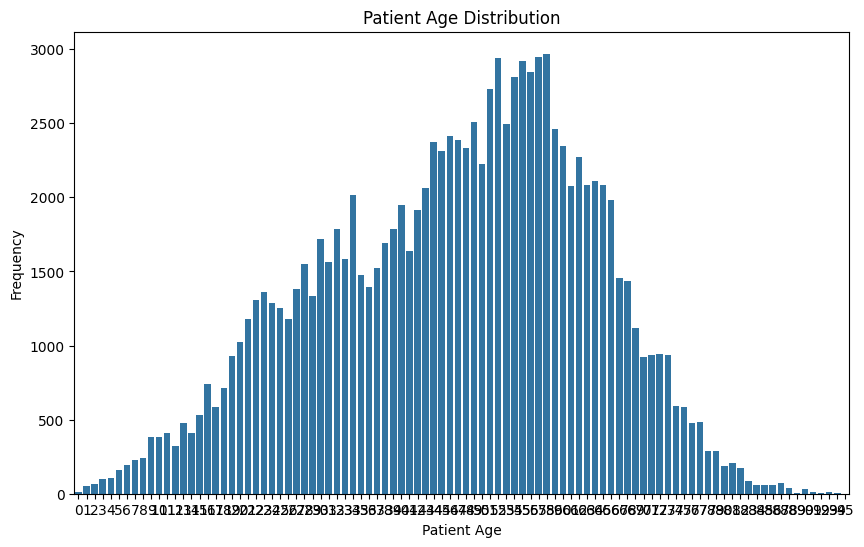

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts
age_counts = all_df['Patient Age'].value_counts().reset_index()
age_counts.columns = ['Patient Age', 'Frequency']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Patient Age', y='Frequency', data=age_counts)

# Adding labels and title
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Patient Age Distribution')

# Show the plot
plt.show()

In [39]:
all_df['Patient Gender'].value_counts()

Patient Gender
M    63340
F    48780
Name: count, dtype: int64

In [33]:
all_df
columns = ['Patient Age', 'Patient Gender']

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [35]:
all_df[['Image Index', 'Follow-up #']].head(20)

,Image Index,Follow-up #
0,00000001_000.png,0
1,00000001_001.png,1
2,00000001_002.png,2
3,00000002_000.png,0
4,00000003_001.png,0
5,00000003_002.png,1
6,00000003_003.png,2
7,00000003_004.png,3
8,00000003_005.png,4
9,00000003_006.png,5


In [53]:
df

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30789
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30793
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,30795
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30801


In [54]:
all_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age > 65,Age > 60,Age > 50,Age > 55
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,False,False,True,True
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,False,False,True,True
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,False,False,True,True
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,True,True,True,True
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168,False,False,False,False
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168,False,False,False,False
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,False,False,False,False
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168,False,False,False,False


In [56]:
temp['Patient Gender'] = temp['Patient Gender'].replace({'M':0, 'F':1})
temp

C:\Users\rrahman3\AppData\Local\Temp\ipykernel_2600\708795557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp['Patient Gender'] = temp['Patient Gender'].replace({'M':0, 'F':1})


,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age > 65,Age > 60,Age > 50,Age > 55
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,PA,2682,2749,0.143000,0.143000,False,False,True,True
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,PA,2894,2729,0.143000,0.143000,False,False,True,True
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,PA,2500,2048,0.168000,0.168000,False,False,True,True
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,PA,2500,2048,0.171000,0.171000,True,True,True,True
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,AP,2500,2048,0.168000,0.168000,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,False
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,True
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,False
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,PA,2500,2048,0.168000,0.168000,False,False,False,False


In [55]:
temp = pd.merge(df, all_df, left_on='id', right_on='Image Index')
temp

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age > 65,Age > 60,Age > 50,Age > 55
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,M,PA,2682,2749,0.143000,0.143000,False,False,True,True
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,M,PA,2894,2729,0.143000,0.143000,False,False,True,True
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,M,PA,2500,2048,0.168000,0.168000,False,False,True,True
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,M,PA,2500,2048,0.171000,0.171000,True,True,True,True
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,M,AP,2500,2048,0.168000,0.168000,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,F,PA,2021,2021,0.194311,0.194311,False,False,True,False
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,F,PA,2021,2021,0.194311,0.194311,False,False,True,True
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,F,PA,2021,2021,0.194311,0.194311,False,False,True,False
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,M,PA,2500,2048,0.168000,0.168000,False,False,False,False
